In [1]:
import pandas as pd
import warnings
from sklearn import preprocessing
from google.colab import drive
drive.mount('/content/gdrive')
warnings.filterwarnings('ignore')
mart=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/mart2.csv",encoding="cp949")
mart.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Unnamed: 0,ID,성별,연령,거주지역,거주지역_광역,거주지역_기초,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부,구매지역_광역,구매지역_기초,구매월,구매요일,총구매액,구매계절,구매시간대,eday,구매연령대
0,0,478207946,남,84,서울 성동구,서울,성동구,가전제품,컴퓨터주변기기,서울 동대문구,20141219,13,1,59000,0,서울,동대문구,12,금,59000,겨울,낮,12 days 00:00:00.000000000,80대
1,1,478207946,남,84,서울 성동구,서울,성동구,가전제품,TV/AV,서울 동대문구,20141031,14,1,106000,0,서울,동대문구,10,금,106000,가을,낮,61 days 00:00:00.000000000,80대
2,2,478207946,남,84,서울 성동구,서울,성동구,가전제품,주방가전,서울 중구,20140815,15,1,37000,0,서울,중구,8,금,37000,여름,낮,138 days 00:00:00.000000000,80대
3,3,478207946,남,84,서울 성동구,서울,성동구,의류잡화,여성용의류-이너웨어,서울 동대문구,20140322,17,1,118000,0,서울,동대문구,3,토,118000,봄,저녁,284 days 00:00:00.000000000,80대
4,4,479806984,남,84,서울 서초구,서울,서초구,생활잡화,화장품,서울 중구,20140704,12,1,22000,0,서울,중구,7,금,22000,여름,낮,180 days 00:00:00.000000000,80대


In [2]:
print(mart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101692 entries, 0 to 101691
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  101692 non-null  int64 
 1   ID          101692 non-null  int64 
 2   성별          101692 non-null  object
 3   연령          101692 non-null  int64 
 4   거주지역        101692 non-null  object
 5   거주지역_광역     101692 non-null  object
 6   거주지역_기초     101692 non-null  object
 7   상품대분류명      101692 non-null  object
 8   상품중분류명      101692 non-null  object
 9   구매지역        101692 non-null  object
 10  구매일자        101692 non-null  int64 
 11  구매시간        101692 non-null  int64 
 12  구매수량        101692 non-null  int64 
 13  구매금액        101692 non-null  int64 
 14  취소여부        101692 non-null  int64 
 15  구매지역_광역     101692 non-null  object
 16  구매지역_기초     101692 non-null  object
 17  구매월         101692 non-null  int64 
 18  구매요일        101692 non-null  object
 19  총구매액        101692 non-

In [3]:
mart.drop('Unnamed: 0',axis=1,inplace=True)
y=mart['성별']
X=mart[['연령','상품중분류명','구매시간','구매수량','구매금액','취소여부','구매요일','총구매액','구매계절','eday']]
X.head()

,연령,상품중분류명,구매시간,구매수량,구매금액,취소여부,구매요일,총구매액,구매계절,eday
0,84,컴퓨터주변기기,13,1,59000,0,금,59000,겨울,12 days 00:00:00.000000000
1,84,TV/AV,14,1,106000,0,금,106000,가을,61 days 00:00:00.000000000
2,84,주방가전,15,1,37000,0,금,37000,여름,138 days 00:00:00.000000000
3,84,여성용의류-이너웨어,17,1,118000,0,토,118000,봄,284 days 00:00:00.000000000
4,84,화장품,12,1,22000,0,금,22000,여름,180 days 00:00:00.000000000


In [4]:
from sklearn.preprocessing import LabelEncoder

X['eday']=X['eday'].astype('str').str.split(' ').str.get(0)
X=X.apply(LabelEncoder().fit_transform)
X.head()

,연령,상품중분류명,구매시간,구매수량,구매금액,취소여부,구매요일,총구매액,구매계절,eday
0,29,27,10,49,860,0,0,59,1,24
1,29,1,11,49,907,0,0,106,0,322
2,29,22,12,49,838,0,0,37,3,44
3,29,18,14,49,919,0,5,118,2,206
4,29,29,9,49,823,0,0,22,3,91


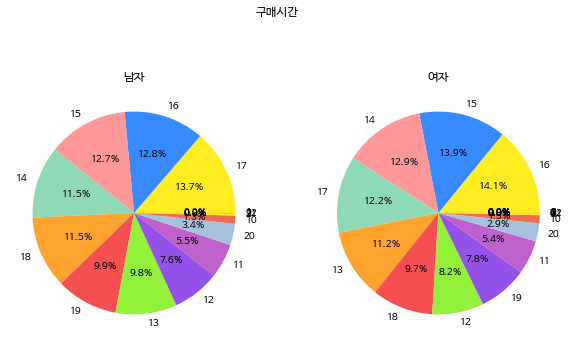

In [5]:
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

"""fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)"""
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 6))
m=[a[1] for a in mart.groupby('성별')['구매시간'].value_counts()[:15].index]
f=[a[1] for a in mart.groupby('성별')['구매시간'].value_counts()[15:].index]

fig.suptitle("구매시간")
ax1.pie(mart.groupby('성별')['구매시간'].value_counts()[:15].values,labels=m,autopct='%.1f%%',colors=['#FFEC21','#378AFF','#ff9999', '#8fd9b6','#FFA32F','#F54F52','#93F03B','#9552EA','#BE61CA','#A5C1DC','#EC6B56'])
ax2.pie(mart.groupby('성별')['구매시간'].value_counts()[15:],labels=f,autopct='%.1f%%',colors=['#FFEC21','#378AFF','#ff9999', '#8fd9b6','#FFA32F','#F54F52','#93F03B','#9552EA','#BE61CA','#A5C1DC','#EC6B56'])

ax1.set_title("남자")
ax2.set_title("여자")
plt.show()

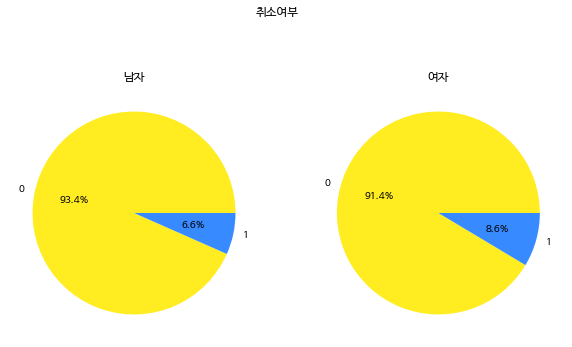

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 6))
m=[a[1] for a in mart.groupby('성별')['취소여부'].value_counts()[:2].index]
f=[a[1] for a in mart.groupby('성별')['취소여부'].value_counts()[2:].index]

fig.suptitle("취소여부")
ax1.pie(mart.groupby('성별')['취소여부'].value_counts()[:2].values,labels=m,autopct='%.1f%%',colors=['#FFEC21','#378AFF','#ff9999', '#8fd9b6','#FFA32F','#F54F52','#93F03B','#9552EA','#BE61CA','#A5C1DC','#EC6B56'])
ax2.pie(mart.groupby('성별')['취소여부'].value_counts()[2:],labels=f,autopct='%.1f%%',colors=['#FFEC21','#378AFF','#ff9999', '#8fd9b6','#FFA32F','#F54F52','#93F03B','#9552EA','#BE61CA','#A5C1DC','#EC6B56'])

ax1.set_title("남자")
ax2.set_title("여자")
plt.show()

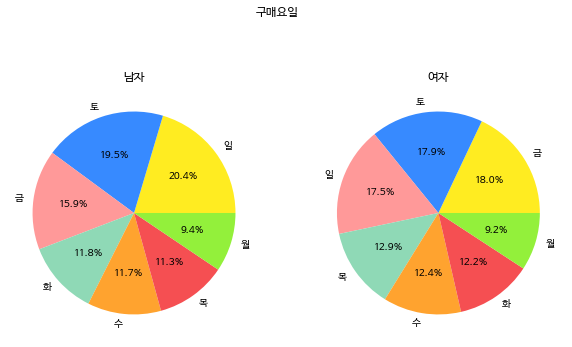

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 6))
m=[a[1] for a in mart.groupby('성별')['구매요일'].value_counts()[:7].index]
f=[a[1] for a in mart.groupby('성별')['구매요일'].value_counts()[7:].index]

fig.suptitle("구매요일")
ax1.pie(mart.groupby('성별')['구매요일'].value_counts()[:7].values,labels=m,autopct='%.1f%%',colors=['#FFEC21','#378AFF','#ff9999', '#8fd9b6','#FFA32F','#F54F52','#93F03B','#9552EA','#BE61CA','#A5C1DC','#EC6B56'])
ax2.pie(mart.groupby('성별')['구매요일'].value_counts()[7:],labels=f,autopct='%.1f%%',colors=['#FFEC21','#378AFF','#ff9999', '#8fd9b6','#FFA32F','#F54F52','#93F03B','#9552EA','#BE61CA','#A5C1DC','#EC6B56'])

ax1.set_title("남자")
ax2.set_title("여자")
plt.show()

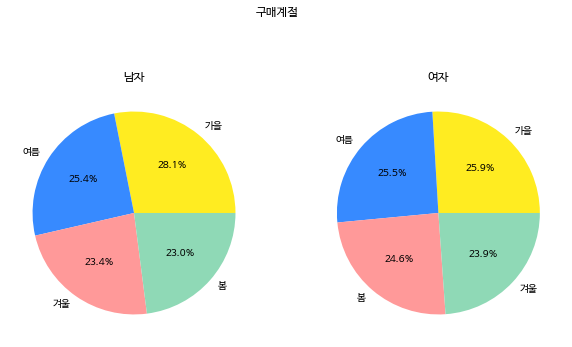

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 6))
m=[a[1] for a in mart.groupby('성별')['구매계절'].value_counts()[:4].index]
f=[a[1] for a in mart.groupby('성별')['구매계절'].value_counts()[4:].index]

fig.suptitle("구매계절")
ax1.pie(mart.groupby('성별')['구매계절'].value_counts()[:4].values,labels=m,autopct='%.1f%%',colors=['#FFEC21','#378AFF','#ff9999', '#8fd9b6','#FFA32F','#F54F52','#93F03B','#9552EA','#BE61CA','#A5C1DC','#EC6B56'])
ax2.pie(mart.groupby('성별')['구매계절'].value_counts()[4:],labels=f,autopct='%.1f%%',colors=['#FFEC21','#378AFF','#ff9999', '#8fd9b6','#FFA32F','#F54F52','#93F03B','#9552EA','#BE61CA','#A5C1DC','#EC6B56'])

ax1.set_title("남자")
ax2.set_title("여자")
plt.show()

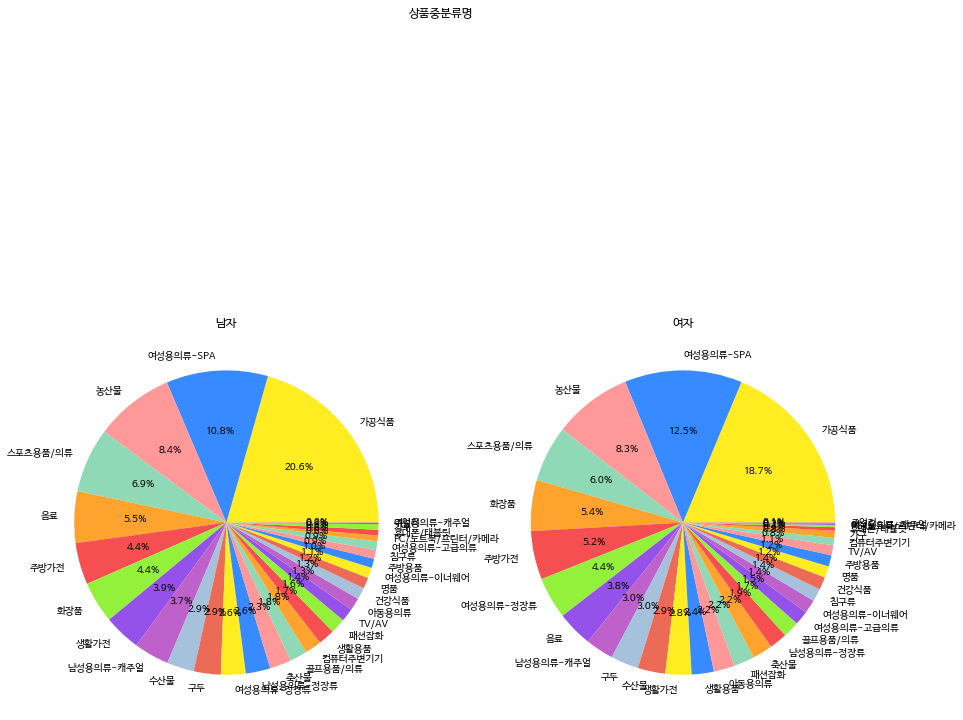

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 15))
m=[a[1] for a in mart.groupby('성별')['상품중분류명'].value_counts()[:31].index]
f=[a[1] for a in mart.groupby('성별')['상품중분류명'].value_counts()[31:].index]

fig.suptitle("상품중분류명")
ax1.pie(mart.groupby('성별')['상품중분류명'].value_counts()[:31].values,labels=m,autopct='%.1f%%',colors=['#FFEC21','#378AFF','#ff9999', '#8fd9b6','#FFA32F','#F54F52','#93F03B','#9552EA','#BE61CA','#A5C1DC','#EC6B56'])
ax2.pie(mart.groupby('성별')['상품중분류명'].value_counts()[31:],labels=f,autopct='%.1f%%',colors=['#FFEC21','#378AFF','#ff9999', '#8fd9b6','#FFA32F','#F54F52','#93F03B','#9552EA','#BE61CA','#A5C1DC','#EC6B56'])

ax1.set_title("남자")
ax2.set_title("여자")
plt.show()

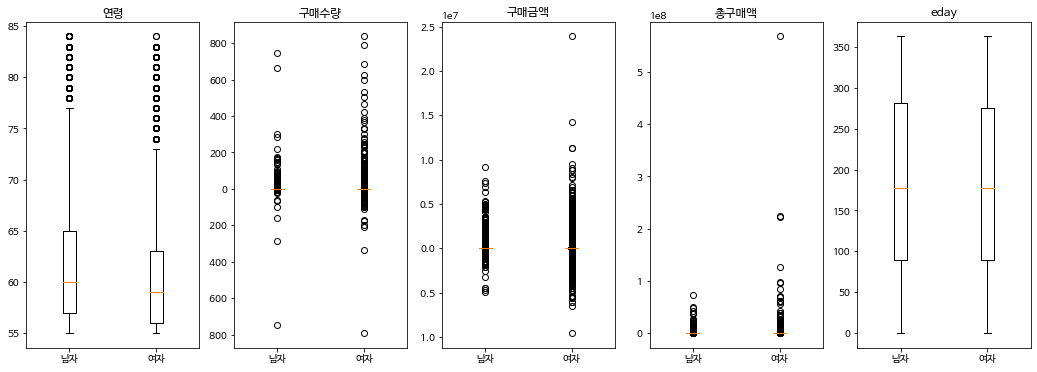

In [10]:
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1, 5,figsize=(18, 6))

m=mart[mart['성별']=='남']
f=mart[mart['성별']=='여']
m['eday']=pd.to_numeric(X['eday'])
f['eday']=pd.to_numeric(X['eday'])
ax1.boxplot([m['연령'],f['연령']])
ax1.set(xticklabels=['남자', '여자'])
ax2.boxplot([m['구매수량'],f['구매수량']])
ax2.set(xticklabels=['남자', '여자'])
ax3.boxplot([m['구매금액'],f['구매금액']])
ax3.set(xticklabels=['남자', '여자'])

ax4.boxplot([m['총구매액'],f['총구매액']])
ax4.set(xticklabels=['남자', '여자'])
ax5.boxplot([m['eday'],f['eday']])
ax5.set(xticklabels=['남자', '여자'])

ax1.set_title("연령")
ax2.set_title("구매수량")
ax3.set_title("구매금액")
ax4.set_title("총구매액")
ax5.set_title("eday")
plt.show()

In [11]:
mart['성별'].value_counts()

여    83150
남    18542
Name: 성별, dtype: int64

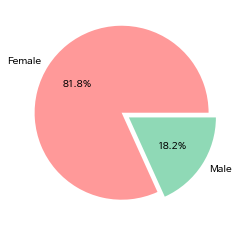

In [12]:
import matplotlib.pyplot as plt
plt.pie(mart['성별'].value_counts().values, labels=['Female','Male'], autopct='%.1f%%',colors = ['#ff9999', '#8fd9b6'],explode=[0.05, 0.05])
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X=X.astype(float)
X=StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

numbers=[3,5,7]
for i in numbers:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scores=cross_val_score(knn,X_train,y_train,cv=3)
    print("validation scores: ",scores)
    print("mean of validation score: ",scores.mean())
    knn_pred=knn.predict(X_test)
    knn_matrix=metrics.confusion_matrix(y_test,knn_pred)
    print(knn_matrix)
    print('\n')
    knn_report=metrics.classification_report(y_test,knn_pred)
    print(knn_report)

validation scores:  [0.79332434 0.7921443  0.79286076]
mean of validation score:  0.7927764666217127
[[ 1681  3860]
 [ 2072 22895]]


              precision    recall  f1-score   support

           남       0.45      0.30      0.36      5541
           여       0.86      0.92      0.89     24967

    accuracy                           0.81     30508
   macro avg       0.65      0.61      0.62     30508
weighted avg       0.78      0.81      0.79     30508

validation scores:  [0.79909811 0.80276467 0.80322825]
mean of validation score:  0.8016970105641716
[[ 1214  4327]
 [ 1426 23541]]


              precision    recall  f1-score   support

           남       0.46      0.22      0.30      5541
           여       0.84      0.94      0.89     24967

    accuracy                           0.81     30508
   macro avg       0.65      0.58      0.59     30508
weighted avg       0.77      0.81      0.78     30508

validation scores:  [0.80723196 0.80870701 0.80963419]
mean of validation scor

In [15]:
from sklearn import svm
svm_model=svm.SVC(kernel='rbf')
svm_model.fit(X_train,y_train)
scores=cross_val_score(svm_model,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
svm_pred=svm_model.predict(X_test)
from sklearn import metrics
svm_matrix=metrics.confusion_matrix(y_test,svm_pred)
print(svm_matrix)

svm_report=metrics.classification_report(y_test,svm_pred)
print(svm_report)

validation scores:  [0.81751517 0.81747303 0.81726231]
mean of validation score:  0.8174168352438751
[[    2  5539]
 [    2 24965]]
              precision    recall  f1-score   support

           남       0.50      0.00      0.00      5541
           여       0.82      1.00      0.90     24967

    accuracy                           0.82     30508
   macro avg       0.66      0.50      0.45     30508
weighted avg       0.76      0.82      0.74     30508



In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

X=X.astype(float)
num_y=y.replace({'남':1,'여':2})
X=preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test=train_test_split(X,num_y,test_size=0.3,random_state=10)

lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
scores=cross_val_score(lr_clf,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())

lr_pred=lr_clf.predict(X_test)

print('accuracy:{:0.3f} '.format(accuracy_score(y_test,lr_pred)))
print('ROC accuracy:{:0.3f} '.format(roc_auc_score(y_test,lr_pred)))

from sklearn.model_selection import GridSearchCV
params={'penalty':['l2','l1'],'C':[0.01,0.1,1,5,10]}
grid_clf=GridSearchCV(lr_clf,param_grid=params,scoring='accuracy',cv=3)

grid_clf.fit(X_train,y_train)
grid_clf.get_params()
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,grid_clf.best_score_))

validation scores:  [0.81738874 0.81734659 0.81734659]
mean of validation score:  0.8173606428410878
accuracy:0.818 
ROC accuracy:0.500 
최적 하이퍼 파라미터:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.817


In [17]:
from sklearn import metrics
logistic_matrix=metrics.confusion_matrix(y_test,lr_pred)
print(logistic_matrix,'\n')
logistic_report=metrics.classification_report(y_test,lr_pred)
print(logistic_report)

[[    0  5541]
 [    0 24967]] 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      5541
           2       0.82      1.00      0.90     24967

    accuracy                           0.82     30508
   macro avg       0.41      0.50      0.45     30508
weighted avg       0.67      0.82      0.74     30508



In [18]:
X=preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=10)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
scores=cross_val_score(dt_clf,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())

dt_pred=dt_clf.predict(X_test)
from sklearn import metrics
dt_matrix=metrics.confusion_matrix(y_test,dt_pred)
print(dt_matrix,'\n')
dt_report=metrics.classification_report(y_test,dt_pred)
print(dt_report)

validation scores:  [0.7607468  0.75939818 0.76192684]
mean of validation score:  0.7606906046302541
[[ 2471  3070]
 [ 3696 21271]] 

              precision    recall  f1-score   support

           남       0.40      0.45      0.42      5541
           여       0.87      0.85      0.86     24967

    accuracy                           0.78     30508
   macro avg       0.64      0.65      0.64     30508
weighted avg       0.79      0.78      0.78     30508



In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
scores=cross_val_score(rf_clf,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
rf_pred=rf_clf.predict(X_test)
rf_matrix=metrics.confusion_matrix(y_test,rf_pred)
print(rf_matrix,'\n')
rf_report=metrics.classification_report(y_test,rf_pred)
print(rf_report)

validation scores:  [0.83715442 0.83787087 0.83458361]
mean of validation score:  0.8365363002922005
[[ 1223  4318]
 [  305 24662]] 

              precision    recall  f1-score   support

           남       0.80      0.22      0.35      5541
           여       0.85      0.99      0.91     24967

    accuracy                           0.85     30508
   macro avg       0.83      0.60      0.63     30508
weighted avg       0.84      0.85      0.81     30508



In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
scores=cross_val_score(gb_clf,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test,gb_pred)
gb_matrix=metrics.confusion_matrix(y_test,gb_pred)
print(gb_matrix,'\n')
gb_report=metrics.classification_report(y_test,gb_pred)
print(gb_report)

validation scores:  [0.82349966 0.82497471 0.82295179]
mean of validation score:  0.8238087210609125
[[  302  5239]
 [  121 24846]] 

              precision    recall  f1-score   support

           남       0.71      0.05      0.10      5541
           여       0.83      1.00      0.90     24967

    accuracy                           0.82     30508
   macro avg       0.77      0.52      0.50     30508
weighted avg       0.81      0.82      0.76     30508



In [21]:
from xgboost import XGBClassifier
xgb_wrapper=XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(X_train,y_train)
scores=cross_val_score(xgb_wrapper,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
xgb_pred=xgb_wrapper.predict(X_test)
xgb_matrix=metrics.confusion_matrix(y_test,xgb_pred)
print(xgb_matrix,'\n')
xgb_report=metrics.classification_report(y_test,xgb_pred)
print(xgb_report)

validation scores:  [0.825059   0.82573331 0.82438469]
mean of validation score:  0.8250590020229266
[[  360  5181]
 [  184 24783]] 

              precision    recall  f1-score   support

           남       0.66      0.06      0.12      5541
           여       0.83      0.99      0.90     24967

    accuracy                           0.82     30508
   macro avg       0.74      0.53      0.51     30508
weighted avg       0.80      0.82      0.76     30508



In [22]:
from lightgbm import LGBMClassifier
lgbm_wrapper=LGBMClassifier(n_estimators=400)
lgbm_wrapper.fit(X_train,y_train,eval_metric="logloss",verbose=True)
scores=cross_val_score(lgbm_wrapper,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
lgbm_pred=lgbm_wrapper.predict(X_test)
lgbm_matrix=metrics.confusion_matrix(y_test,lgbm_pred)
print(lgbm_matrix,'\n')
lgbm_report=metrics.classification_report(y_test,lgbm_pred)
print(lgbm_report)

validation scores:  [0.82918914 0.82796696 0.82939987]
mean of validation score:  0.8288519892110587
[[  693  4848]
 [  216 24751]] 

              precision    recall  f1-score   support

           남       0.76      0.13      0.21      5541
           여       0.84      0.99      0.91     24967

    accuracy                           0.83     30508
   macro avg       0.80      0.56      0.56     30508
weighted avg       0.82      0.83      0.78     30508



In [23]:
from sklearn.cluster import KMeans
from sklearn import metrics

y_test=pd.Series(y_test)
y_train=pd.Series(y_train)
num_y_test=y_test.replace({'남':0,'여':1})
num_y_train=y_train.replace({'남':0,'여':1})
kmeans=KMeans(n_clusters=2,random_state=1)
kmeans.fit(X_train,num_y_train)
scores=cross_val_score(kmeans,X_train,num_y_train,cv=3,scoring='accuracy')
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
km_pred=kmeans.predict(X_test)
km_matrix=metrics.confusion_matrix(num_y_test,km_pred)
print(km_matrix,'\n')
km_report=metrics.classification_report(num_y_test,km_pred)
print(km_report)

validation scores:  [0.78898348 0.57307822 0.21122724]
mean of validation score:  0.5244296471117106
[[ 3249  2292]
 [14975  9992]] 

              precision    recall  f1-score   support

           0       0.18      0.59      0.27      5541
           1       0.81      0.40      0.54     24967

    accuracy                           0.43     30508
   macro avg       0.50      0.49      0.40     30508
weighted avg       0.70      0.43      0.49     30508



In [24]:
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

lgbm_clf=LGBMClassifier(n_estimators=400)
rf_clf=RandomForestClassifier(random_state=0)
vo_clf=VotingClassifier(estimators=[('LGBM',lgbm_clf),('RF',rf_clf)],voting='soft')
vo_clf.fit(X_train,y_train)
scores=cross_val_score(vo_clf,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
vo_pred=vo_clf.predict(X_test)
vo_matrix=metrics.confusion_matrix(y_test,vo_pred)
print(vo_matrix,'\n')
vo_report=metrics.classification_report(y_test,vo_pred)
print(vo_report)

validation scores:  [0.83336143 0.83230782 0.83192852]
mean of validation score:  0.8325325915936165
[[  810  4731]
 [  161 24806]] 

              precision    recall  f1-score   support

           남       0.83      0.15      0.25      5541
           여       0.84      0.99      0.91     24967

    accuracy                           0.84     30508
   macro avg       0.84      0.57      0.58     30508
weighted avg       0.84      0.84      0.79     30508



In [25]:
#SMOTE 진행
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(X)

from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=0)
X_train_sm, y_train_sm=smote.fit_sample(X,y)
X_train_sm, num_y_train_sm=smote.fit_sample(X,num_y)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X.shape)
print(y)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_sm.shape, y_train_sm.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_sm).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (101692, 10)
0         남
1         남
2         남
3         남
4         남
         ..
101687    여
101688    여
101689    여
101690    여
101691    여
Name: 성별, Length: 101692, dtype: object
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (166300, 10) (166300,)
SMOTE 적용 후 레이블 값 분포: 
 여    83150
남    83150
dtype: int64


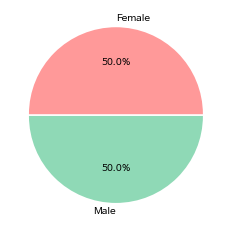

In [26]:
import matplotlib.pyplot as plt
plt.pie(pd.Series(y_train_sm).value_counts(), labels=['Female','Male'], autopct='%.1f%%',colors = ['#ff9999', '#8fd9b6'],explode=[0.01, 0.01])
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train_sm=preprocessing.StandardScaler().fit(X_train_sm).transform(X_train_sm)
X_train, X_test, y_train, y_test=train_test_split(X_train_sm,y_train_sm,test_size=0.3,random_state=10)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
numbers=[3,5,7]
for i in numbers:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scores=cross_val_score(knn,X_train,y_train,cv=3)
    print("validation scores: ",scores)
    print("mean of validation score: ",scores.mean())
    knn_pred=knn.predict(X_test)
    knn_matrix=metrics.confusion_matrix(y_test,knn_pred)
    print(knn_matrix)
    print('\n')
    knn_report=metrics.classification_report(y_test,knn_pred)
    print(knn_report)

validation scores:  [0.78968663 0.78803185 0.79200062]
mean of validation score:  0.7899063673201363
[[22996  1893]
 [ 6852 18149]]


              precision    recall  f1-score   support

           남       0.77      0.92      0.84     24889
           여       0.91      0.73      0.81     25001

    accuracy                           0.82     49890
   macro avg       0.84      0.82      0.82     49890
weighted avg       0.84      0.82      0.82     49890

validation scores:  [0.75793733 0.75512203 0.76035358]
mean of validation score:  0.7578043112016593
[[22553  2336]
 [ 7906 17095]]


              precision    recall  f1-score   support

           남       0.74      0.91      0.81     24889
           여       0.88      0.68      0.77     25001

    accuracy                           0.79     49890
   macro avg       0.81      0.79      0.79     49890
weighted avg       0.81      0.79      0.79     49890

validation scores:  [0.73778476 0.73587094 0.74009742]
mean of validation scor

In [29]:
from sklearn import svm
svm_model=svm.SVC(kernel='rbf')
svm_model.fit(X_train,y_train)
scores=cross_val_score(svm_model,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
svm_pred=svm_model.predict(X_test)
from sklearn import metrics
svm_matrix=metrics.confusion_matrix(y_test,svm_pred)
print(svm_matrix)

svm_report=metrics.classification_report(y_test,svm_pred)
print(svm_report)

validation scores:  [0.59535099 0.59075329 0.58969667]
mean of validation score:  0.5919336533172285
[[14518 10371]
 [ 9604 15397]]
              precision    recall  f1-score   support

           남       0.60      0.58      0.59     24889
           여       0.60      0.62      0.61     25001

    accuracy                           0.60     49890
   macro avg       0.60      0.60      0.60     49890
weighted avg       0.60      0.60      0.60     49890



In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

X=X.astype(float)
num_y=y.replace({'남':1,'여':2})
X=preprocessing.StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test=train_test_split(X_train_sm,num_y_train_sm,test_size=0.3,random_state=10)

lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
scores=cross_val_score(lr_clf,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())

lr_pred=lr_clf.predict(X_test)

print('accuracy:{:0.3f} '.format(accuracy_score(y_test,lr_pred)))
print('ROC accuracy:{:0.3f} '.format(roc_auc_score(y_test,lr_pred)))

from sklearn.model_selection import GridSearchCV
params={'penalty':['l2','l1'],'C':[0.01,0.1,1,5,10]}
grid_clf=GridSearchCV(lr_clf,param_grid=params,scoring='accuracy',cv=3)

grid_clf.fit(X_train,y_train)
grid_clf.get_params()
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,grid_clf.best_score_))

validation scores:  [0.56239048 0.56047213 0.5550344 ]
mean of validation score:  0.5592990027362558
accuracy:0.562 
ROC accuracy:0.562 
최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도:0.559


In [31]:
from sklearn import metrics
logistic_matrix=metrics.confusion_matrix(y_test,lr_pred)
print(logistic_matrix,'\n')
logistic_report=metrics.classification_report(y_test,lr_pred)
print(logistic_report)

[[12775 12114]
 [ 9719 15282]] 

              precision    recall  f1-score   support

           1       0.57      0.51      0.54     24889
           2       0.56      0.61      0.58     25001

    accuracy                           0.56     49890
   macro avg       0.56      0.56      0.56     49890
weighted avg       0.56      0.56      0.56     49890



In [32]:
X=preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_train_sm,y_train_sm,test_size=0.3,random_state=10)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
scores=cross_val_score(dt_clf,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())

dt_pred=dt_clf.predict(X_test)
from sklearn import metrics
dt_matrix=metrics.confusion_matrix(y_test,dt_pred)
print(dt_matrix,'\n')
dt_report=metrics.classification_report(y_test,dt_pred)
print(dt_report)

validation scores:  [0.84212968 0.83697137 0.8413267 ]
mean of validation score:  0.8401425823632421
[[21768  3121]
 [ 3884 21117]] 

              precision    recall  f1-score   support

           남       0.85      0.87      0.86     24889
           여       0.87      0.84      0.86     25001

    accuracy                           0.86     49890
   macro avg       0.86      0.86      0.86     49890
weighted avg       0.86      0.86      0.86     49890



In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
scores=cross_val_score(rf_clf,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
rf_pred=rf_clf.predict(X_test)
rf_matrix=metrics.confusion_matrix(y_test,rf_pred)
print(rf_matrix,'\n')
rf_report=metrics.classification_report(y_test,rf_pred)
print(rf_report)

validation scores:  [0.89879909 0.89472463 0.89423498]
mean of validation score:  0.8959195698005061
[[21346  3543]
 [ 1061 23940]] 

              precision    recall  f1-score   support

           남       0.95      0.86      0.90     24889
           여       0.87      0.96      0.91     25001

    accuracy                           0.91     49890
   macro avg       0.91      0.91      0.91     49890
weighted avg       0.91      0.91      0.91     49890



In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
scores=cross_val_score(gb_clf,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test,gb_pred)
gb_matrix=metrics.confusion_matrix(y_test,gb_pred)
print(gb_matrix,'\n')
gb_report=metrics.classification_report(y_test,gb_pred)
print(gb_report)

validation scores:  [0.80893722 0.80532433 0.8024895 ]
mean of validation score:  0.8055836839314575
[[16427  8462]
 [ 1276 23725]] 

              precision    recall  f1-score   support

           남       0.93      0.66      0.77     24889
           여       0.74      0.95      0.83     25001

    accuracy                           0.80     49890
   macro avg       0.83      0.80      0.80     49890
weighted avg       0.83      0.80      0.80     49890



In [35]:
from xgboost import XGBClassifier
xgb_wrapper=XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(X_train,y_train)
scores=cross_val_score(xgb_wrapper,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
xgb_pred=xgb_wrapper.predict(X_test)
xgb_matrix=metrics.confusion_matrix(y_test,xgb_pred)
print(xgb_matrix,'\n')
xgb_report=metrics.classification_report(y_test,xgb_pred)
print(xgb_report)

validation scores:  [0.8496289  0.8509909  0.84774373]
mean of validation score:  0.8494545127189115
[[17833  7056]
 [  493 24508]] 

              precision    recall  f1-score   support

           남       0.97      0.72      0.83     24889
           여       0.78      0.98      0.87     25001

    accuracy                           0.85     49890
   macro avg       0.87      0.85      0.85     49890
weighted avg       0.87      0.85      0.85     49890



In [36]:
from lightgbm import LGBMClassifier
lgbm_wrapper=LGBMClassifier(n_estimators=400)
lgbm_wrapper.fit(X_train,y_train,eval_metric="logloss",verbose=True)
scores=cross_val_score(lgbm_wrapper,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
lgbm_pred=lgbm_wrapper.predict(X_test)
lgbm_matrix=metrics.confusion_matrix(y_test,lgbm_pred)
print(lgbm_matrix,'\n')
lgbm_report=metrics.classification_report(y_test,lgbm_pred)
print(lgbm_report)

validation scores:  [0.87926502 0.88467387 0.88238023]
mean of validation score:  0.8821063726599814
[[19484  5405]
 [  398 24603]] 

              precision    recall  f1-score   support

           남       0.98      0.78      0.87     24889
           여       0.82      0.98      0.89     25001

    accuracy                           0.88     49890
   macro avg       0.90      0.88      0.88     49890
weighted avg       0.90      0.88      0.88     49890



In [37]:
from sklearn.cluster import KMeans
from sklearn import metrics

y_test=pd.Series(y_test)
y_train=pd.Series(y_train)
num_y_test=y_test.replace({'남':0,'여':1})
num_y_train=y_train.replace({'남':0,'여':1})
kmeans=KMeans(n_clusters=2,random_state=12)
kmeans.fit(X_train,num_y_train)
scores=cross_val_score(kmeans,X_train,num_y_train,cv=3,scoring='accuracy')
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
km_pred=kmeans.predict(X_test)
km_matrix=metrics.confusion_matrix(num_y_test,km_pred)
print(km_matrix,'\n')
km_report=metrics.classification_report(num_y_test,km_pred)
print(km_report)

validation scores:  [0.49819606 0.50248692 0.49985826]
mean of validation score:  0.5001804139193511
[[ 1131 23758]
 [ 1093 23908]] 

              precision    recall  f1-score   support

           0       0.51      0.05      0.08     24889
           1       0.50      0.96      0.66     25001

    accuracy                           0.50     49890
   macro avg       0.51      0.50      0.37     49890
weighted avg       0.51      0.50      0.37     49890



In [38]:
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test=train_test_split(X_train_sm,y_train_sm,test_size=0.3,random_state=10)
lgbm_clf=LGBMClassifier(n_estimators=400)
rf_clf=RandomForestClassifier(random_state=0)
vo_clf=VotingClassifier(estimators=[('LGBM',lgbm_clf),('RF',rf_clf)],voting='soft')
vo_clf.fit(X_train,y_train)
scores=cross_val_score(vo_clf,X_train,y_train,cv=3,scoring='accuracy')
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
vo_pred=vo_clf.predict(X_test)
vo_matrix=metrics.confusion_matrix(y_test,vo_pred)
print(vo_matrix,'\n')
vo_report=metrics.classification_report(y_test,vo_pred)
print(vo_report)

validation scores:  [0.90132461 0.90302296 0.90178594]
mean of validation score:  0.9020445040795324
[[20679  4210]
 [  386 24615]] 

              precision    recall  f1-score   support

           남       0.98      0.83      0.90     24889
           여       0.85      0.98      0.91     25001

    accuracy                           0.91     49890
   macro avg       0.92      0.91      0.91     49890
weighted avg       0.92      0.91      0.91     49890



In [39]:
#feature selection
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

y=mart['성별']
X=mart.drop(['성별','ID'],axis=1)
X=X.apply(LabelEncoder().fit_transform)

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
X_scale=scaler.fit_transform(X)

from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=0)
X_sm, y_sm=smote.fit_sample(X_scale,y)
X_train, X_test, y_train, y_test=train_test_split(X_sm,y_sm,test_size=0.3,random_state=10)

In [41]:
select=SelectPercentile(score_func=f_classif,percentile=50)
select.fit(X_train,y_train)

X_train_selected=select.transform(X_train)

print("X_train.shape", X_train.shape)
print("X_train_selected.shape", X_train_selected.shape)

X_train.shape (116410, 21)
X_train_selected.shape (116410, 10)


In [42]:
mask=select.get_support()
X.columns[mask]

Index(['연령', '상품대분류명', '상품중분류명', '구매일자', '구매시간', '취소여부', '구매월', '구매요일',
       '구매시간대', '구매연령대'],
      dtype='object')

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
numbers=[3,5,7]
for i in numbers:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scores=cross_val_score(knn,X_train,y_train,cv=3)
    print("validation scores: ",scores)
    print("mean of validation score: ",scores.mean())
    knn_pred=knn.predict(X_test)
    knn_matrix=metrics.confusion_matrix(y_test,knn_pred)
    print(knn_matrix)
    print('\n')
    knn_report=metrics.classification_report(y_test,knn_pred)
    print(knn_report)

validation scores:  [0.8526956  0.85297529 0.85593897]
mean of validation score:  0.8538699525328936
[[24130   759]
 [ 4794 20207]]


              precision    recall  f1-score   support

           남       0.83      0.97      0.90     24889
           여       0.96      0.81      0.88     25001

    accuracy                           0.89     49890
   macro avg       0.90      0.89      0.89     49890
weighted avg       0.90      0.89      0.89     49890

validation scores:  [0.82561076 0.82612169 0.82545164]
mean of validation score:  0.8257280312453351
[[23757  1132]
 [ 5989 19012]]


              precision    recall  f1-score   support

           남       0.80      0.95      0.87     24889
           여       0.94      0.76      0.84     25001

    accuracy                           0.86     49890
   macro avg       0.87      0.86      0.86     49890
weighted avg       0.87      0.86      0.86     49890

validation scores:  [0.80509741 0.80370074 0.80362343]
mean of validation scor

In [44]:
from sklearn import svm
svm_model=svm.SVC(kernel='rbf')
svm_model.fit(X_train,y_train)
scores=cross_val_score(svm_model,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
svm_pred=svm_model.predict(X_test)
from sklearn import metrics
svm_matrix=metrics.confusion_matrix(y_test,svm_pred)
print(svm_matrix)

svm_report=metrics.classification_report(y_test,svm_pred)
print(svm_report)

validation scores:  [0.677224   0.67592712 0.67430353]
mean of validation score:  0.6758182165983943
[[16915  7974]
 [ 7555 17446]]
              precision    recall  f1-score   support

           남       0.69      0.68      0.69     24889
           여       0.69      0.70      0.69     25001

    accuracy                           0.69     49890
   macro avg       0.69      0.69      0.69     49890
weighted avg       0.69      0.69      0.69     49890



In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

X=X.astype(float)
num_y=pd.Series(y_sm)
num_y=num_y.replace({'남':1,'여':2})
X=preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_sm,num_y,test_size=0.3,random_state=10)

lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
scores=cross_val_score(lr_clf,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())

lr_pred=lr_clf.predict(X_test)

print('accuracy:{:0.3f} '.format(accuracy_score(y_test,lr_pred)))
print('ROC accuracy:{:0.3f} '.format(roc_auc_score(y_test,lr_pred)))

from sklearn.model_selection import GridSearchCV
params={'penalty':['l2','l1'],'C':[0.01,0.1,1,5,10]}
grid_clf=GridSearchCV(lr_clf,param_grid=params,scoring='accuracy',cv=3)

grid_clf.fit(X_train,y_train)
grid_clf.get_params()
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,grid_clf.best_score_))

validation scores:  [0.56620451 0.56402855 0.55779192]
mean of validation score:  0.5626749975988541
accuracy:0.566 
ROC accuracy:0.566 
최적 하이퍼 파라미터:{'C': 10, 'penalty': 'l2'}, 최적 평균 정확도:0.563


In [46]:
from sklearn import metrics
logistic_matrix=metrics.confusion_matrix(y_test,lr_pred)
print(logistic_matrix,'\n')
logistic_report=metrics.classification_report(y_test,lr_pred)
print(logistic_report)

[[13075 11814]
 [ 9849 15152]] 

              precision    recall  f1-score   support

           1       0.57      0.53      0.55     24889
           2       0.56      0.61      0.58     25001

    accuracy                           0.57     49890
   macro avg       0.57      0.57      0.57     49890
weighted avg       0.57      0.57      0.57     49890



In [47]:
X_train, X_test, y_train, y_test=train_test_split(X_sm,y_sm,test_size=0.3,random_state=10)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
scores=cross_val_score(dt_clf,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())

dt_pred=dt_clf.predict(X_test)
from sklearn import metrics
dt_matrix=metrics.confusion_matrix(y_test,dt_pred)
print(dt_matrix,'\n')
dt_report=metrics.classification_report(y_test,dt_pred)
print(dt_report)

validation scores:  [0.90346356 0.90438884 0.90652785]
mean of validation score:  0.9047934140525178
[[23154  1735]
 [ 2036 22965]] 

              precision    recall  f1-score   support

           남       0.92      0.93      0.92     24889
           여       0.93      0.92      0.92     25001

    accuracy                           0.92     49890
   macro avg       0.92      0.92      0.92     49890
weighted avg       0.92      0.92      0.92     49890



In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)
scores=cross_val_score(rf_clf,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
rf_pred=rf_clf.predict(X_test)
rf_matrix=metrics.confusion_matrix(y_test,rf_pred)
print(rf_matrix,'\n')
rf_report=metrics.classification_report(y_test,rf_pred)
print(rf_report)

validation scores:  [0.92467374 0.92338299 0.92400149]
mean of validation score:  0.9240194085187144
[[21884  3005]
 [  777 24224]]

              precision    recall  f1-score   support

           남       0.97      0.88      0.92     24889
           여       0.89      0.97      0.93     25001

    accuracy                           0.92     49890
   macro avg       0.93      0.92      0.92     49890
weighted avg       0.93      0.92      0.92     49890



In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
scores=cross_val_score(gb_clf,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test,gb_pred)
gb_matrix=metrics.confusion_matrix(y_test,gb_pred)
print(gb_matrix,'\n')
gb_report=metrics.classification_report(y_test,gb_pred)
print(gb_report)

validation scores:  [0.82888362 0.82813185 0.82756488]
mean of validation score:  0.8281934482418004
[[17474  7415]
 [ 1097 23904]] 

              precision    recall  f1-score   support

           남       0.94      0.70      0.80     24889
           여       0.76      0.96      0.85     25001

    accuracy                           0.83     49890
   macro avg       0.85      0.83      0.83     49890
weighted avg       0.85      0.83      0.83     49890



In [50]:
from xgboost import XGBClassifier
xgb_wrapper=XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(X_train,y_train)
scores=cross_val_score(xgb_wrapper,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
xgb_pred=xgb_wrapper.predict(X_test)
xgb_matrix=metrics.confusion_matrix(y_test,xgb_pred)
print(xgb_matrix,'\n')
xgb_report=metrics.classification_report(y_test,xgb_pred)
print(xgb_report)

validation scores:  [0.87689413 0.87776718 0.87477772]
mean of validation score:  0.8764796803156575
[[19346  5543]
 [  665 24336]] 

              precision    recall  f1-score   support

           남       0.97      0.78      0.86     24889
           여       0.81      0.97      0.89     25001

    accuracy                           0.88     49890
   macro avg       0.89      0.88      0.87     49890
weighted avg       0.89      0.88      0.87     49890



In [51]:
from lightgbm import LGBMClassifier

lgbm_wrapper=LGBMClassifier(n_estimators=400)
lgbm_wrapper.fit(X_train,y_train,eval_metric="logloss",verbose=True)
scores=cross_val_score(lgbm_wrapper,X_train,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
lgbm_pred=lgbm_wrapper.predict(X_test)
lgbm_matrix=metrics.confusion_matrix(y_test,lgbm_pred)
print(lgbm_matrix,'\n')
lgbm_report=metrics.classification_report(y_test,lgbm_pred)
print(lgbm_report)

validation scores:  [0.91671065 0.91183749 0.91255908]
mean of validation score:  0.9137024052208302
[[22615  2274]
 [ 1816 23185]]

              precision    recall  f1-score   support

           남       0.93      0.91      0.92     24889
           여       0.91      0.93      0.92     25001

    accuracy                           0.92     49890
   macro avg       0.92      0.92      0.92     49890
weighted avg       0.92      0.92      0.92     49890



In [52]:
from sklearn.cluster import KMeans
from sklearn import metrics

y_test=pd.Series(y_test)
y_train=pd.Series(y_train)
num_y_test=y_test.replace({'남':0,'여':1})
num_y_train=y_train.replace({'남':0,'여':1})
kmeans=KMeans(n_clusters=2)
kmeans.fit(X_train,num_y_train)
scores=cross_val_score(kmeans,X_train,num_y_train,cv=3,scoring='accuracy')
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
km_pred=kmeans.predict(X_test)
km_matrix=metrics.confusion_matrix(num_y_test,km_pred)
print(km_matrix,'\n')
km_report=metrics.classification_report(num_y_test,km_pred)
print(km_report)

validation scores:  [0.50015462 0.4940082  0.49369894]
mean of validation score:  0.4959539197603
[[14961  9928]
 [14737 10264]] 

              precision    recall  f1-score   support

           0       0.50      0.60      0.55     24889
           1       0.51      0.41      0.45     25001

    accuracy                           0.51     49890
   macro avg       0.51      0.51      0.50     49890
weighted avg       0.51      0.51      0.50     49890



In [53]:
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test=train_test_split(X_sm,y_sm,test_size=0.3,random_state=10)

lgbm_clf=LGBMClassifier(n_estimators=400)
rf_clf=RandomForestClassifier(random_state=0)
dt_clf=DecisionTreeClassifier(random_state=156)
vo_clf=VotingClassifier(estimators=[('LGBM',lgbm_clf),('RF',rf_clf),('DT',dt_clf)],voting='soft')

X_test_selected=select.transform(X_test)
vo_clf.fit(X_train_selected,y_train)
scores=cross_val_score(vo_clf,X_train_selected,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
vo_pred=vo_clf.predict(X_test_selected)
vo_matrix=metrics.confusion_matrix(y_test,vo_pred)
print(vo_matrix,'\n')
vo_report=metrics.classification_report(y_test,vo_pred)
print(vo_report)

validation scores:  [0.93871766 0.93887071 0.94031389]
mean of validation score:  0.939300752367446
[[22435  2454]
 [  388 24613]]

              precision    recall  f1-score   support

           남       0.98      0.90      0.94     24889
           여       0.91      0.98      0.95     25001

    accuracy                           0.94     49890
   macro avg       0.95      0.94      0.94     49890
weighted avg       0.95      0.94      0.94     49890



In [54]:
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

X_train, X_test, y_train, y_test=train_test_split(X_sm,y_sm,test_size=0.3,random_state=10)

lgbm_clf=LGBMClassifier(n_estimators=400)
rf_clf=RandomForestClassifier()
dt_clf=DecisionTreeClassifier()
vo_clf=VotingClassifier(estimators=[('LGBM',lgbm_clf),('RF',rf_clf),('DT',dt_clf)],voting='soft')

params = {'LGBM__num_leaves': [31, 127],'LGBM__reg_alpha': [0.1, 0.5], 'RF__max_features': ['auto', 'sqrt'],'RF__min_samples_leaf': [2, 4],
      'DT__criterion':['gini','entropy'],'DT__max_depth': [3,5]}   


grid_vo = GridSearchCV(estimator=vo_clf, param_grid=params, cv=2)

X_test_selected=select.transform(X_test)
grid_vo.fit(X_train_selected,y_train)
print (grid_vo.best_params_)

scores=cross_val_score(grid_vo,X_train_selected,y_train,cv=3)
print("validation scores: ",scores)
print("mean of validation score: ",scores.mean())
vo_pred=grid_vo.predict(X_test_selected)
vo_matrix=metrics.confusion_matrix(y_test,vo_pred)
print(vo_matrix,'\n')
vo_report=metrics.classification_report(y_test,vo_pred)
print(vo_report)

{'DT__criterion': 'gini', 'DT__max_depth': 3, 'LGBM__num_leaves': 127, 'LGBM__reg_alpha': 0.1, 'RF__max_features': 'auto', 'RF__min_samples_leaf': 2}
validation scores:  [0.95760746 0.9560601  0.95763214]
mean of validation score:  0.9570999011462762
[[23536  1353]
 [  339 24662]]

              precision    recall  f1-score   support

           남       0.99      0.95      0.97     24889
           여       0.95      0.99      0.97     25001

    accuracy                           0.97     49890
   macro avg       0.97      0.97      0.97     49890
weighted avg       0.97      0.97      0.97     49890



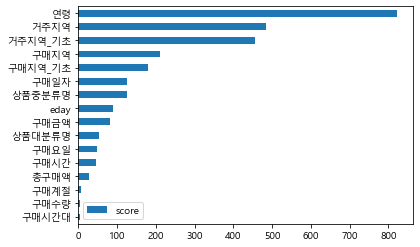

In [55]:
from xgboost import XGBClassifier
xgb_imp=XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
mart_imp=mart.apply(LabelEncoder().fit_transform)
mart_imp=mart_imp.drop(['성별','ID'],axis=1)
xgb_imp.fit(mart_imp,y)

feature_important = xgb_imp.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.plot(kind='barh')

In [56]:
vo_pred_series=pd.Series(vo_pred)
vo_pred_series=vo_pred_series.replace({'남':0,'여':1})
confusion_matrix=metrics.confusion_matrix(km_pred,vo_pred_series)
confusion_matrix

array([[14649, 15049],
       [ 9786, 10406]], dtype=int64)